In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, spearmanr


In [2]:
projdir = '/u/home/t/terencew/project-cluo/igvf/pilot/multiome'
donors = np.loadtxt(f'{projdir}/txt/donors.txt', dtype=str)
samples = np.loadtxt(f'{projdir}/txt/samples.txt', dtype=str)
s = samples[0]

gex_methods = ['demuxlet', 'freemuxlet',  'vireo', 'vireo_nogenos',
    'souporcell', 'souporcell_nogenos', 'scsplit', 'scsplit_nogenos', 'demuxalot'] 
atac_methods = ['demuxlet', 'freemuxlet',  'vireo', 'vireo_nogenos',
    'souporcell', 'souporcell_nogenos', 'scsplit', 'scsplit_nogenos', 'scavengers']

prop_doub = np.loadtxt(f'{projdir}/ambient/ambisim/prop_doub/txt/experiments.txt', dtype=str)
mux_test = np.loadtxt(f'{projdir}/ambient/ambisim/mux_test/txt/experiments.txt', dtype=str)

pd_mask = ['40' not in x and '50' not in x for x in prop_doub]
pd_exps = prop_doub[pd_mask]

pd_prop = [x.split('_')[0] for x in pd_exps]
doub = [x.split('_')[1] for x in pd_exps]

### extract prop_doub experiment that has 4 donors, 20% doublet rate, 20% ambient rate

In [3]:
gex_pd = pd.read_csv(f'{projdir}/csv/ambisim/prop_doub_gex.csv', sep='\t', header=0, index_col=0)
atac_pd = pd.read_csv(f'{projdir}/csv/ambisim/prop_doub_atac.csv', sep='\t', header=0, index_col=0)

In [46]:
gex_mux = pd.read_csv(f'{projdir}/csv/ambisim/mux_gex.csv', sep='\t', header=0, index_col=0)
atac_mux = pd.read_csv(f'{projdir}/csv/ambisim/mux_atac.csv', sep='\t', header=0, index_col=0)

In [4]:
exp = '20_20'
tmp_gex_pd = gex_pd[gex_pd['exp'] == exp]
tmp_atac_pd = atac_pd[atac_pd['exp'] == exp]

In [47]:
exp = '10_20'
tmp_gex_mux = gex_mux[gex_mux['exp'] == exp]
tmp_atac_mux = atac_mux[atac_mux['exp'] == exp]

In [48]:
idx = sorted(tmp_gex_pd.index.unique())

In [49]:
inter_gex = pd.DataFrame(index = idx, columns = gex_methods)
for method in gex_methods:
    one_gex_pd = tmp_gex_pd[tmp_gex_pd['method'] == method]
    inter_gex[method] = one_gex_pd['donor_id'].sort_index()

In [50]:
inter_atac = pd.DataFrame(index = idx, columns = atac_methods)
for method in atac_methods:
    one_atac_pd = tmp_atac_pd[tmp_atac_pd['method'] == method]
    inter_atac[method] = one_atac_pd['donor_id'].sort_index()

In [51]:
status_gex = inter_gex.copy()
status_atac = inter_atac.copy()

for donor in donors:
    status_gex.replace({donor : 1}, inplace=True)
    status_atac.replace({donor : 1}, inplace=True)
    
status_gex.replace({'doublet' : 0, 'unassigned' : 0}, inplace=True)
status_atac.replace({'doublet' : 0, 'unassigned' : 0}, inplace=True)


In [52]:
n_drops = status_gex.shape[0]
gex_pd_overlap = pd.DataFrame(columns=gex_methods)
for method1 in gex_methods:
    gex_pd_overlap.loc[method1] = [np.sum(status_gex[method1] == status_gex[method2]) / n_drops
                            for method2 in gex_methods]

In [53]:
n_drops = status_atac.shape[0]
atac_pd_overlap = pd.DataFrame(columns=atac_methods)
for method1 in atac_methods:
    atac_pd_overlap.loc[method1] = [np.sum(status_atac[method1] == status_atac[method2]) / n_drops
                            for method2 in atac_methods]

In [57]:
gex_pd_overlap

NameError: name 'gex_pd_overlap' is not defined

In [58]:
atac_pd_overlap

,demuxlet,freemuxlet,vireo,vireo_nogenos,scsplit,scsplit_nogenos,souporcell,souporcell_nogenos,scavengers
demuxlet,1.000000,0.743668,0.834256,0.829544,0.718695,0.717635,0.837908,0.848039,0.669926
freemuxlet,0.743668,1.000000,0.766168,0.801037,0.822830,0.825539,0.860997,0.850630,0.910708
vireo,0.834256,0.766168,1.000000,0.935917,0.806220,0.803275,0.879727,0.885617,0.691247
vireo_nogenos,0.829544,0.801037,0.935917,1.000000,0.817529,0.816704,0.896454,0.899517,0.726116
scsplit,0.718695,0.822830,0.806220,0.817529,1.000000,0.954412,0.795264,0.787725,0.769820
scsplit_nogenos,0.717635,0.825539,0.803275,0.816704,0.954412,1.000000,0.794440,0.787136,0.773472
souporcell,0.837908,0.860997,0.879727,0.896454,0.795264,0.794440,1.000000,0.948639,0.788903
souporcell_nogenos,0.848039,0.850630,0.885617,0.899517,0.787725,0.787136,0.948639,1.000000,0.775710
scavengers,0.669926,0.910708,0.691247,0.726116,0.769820,0.773472,0.788903,0.775710,1.000000


<Axes: >

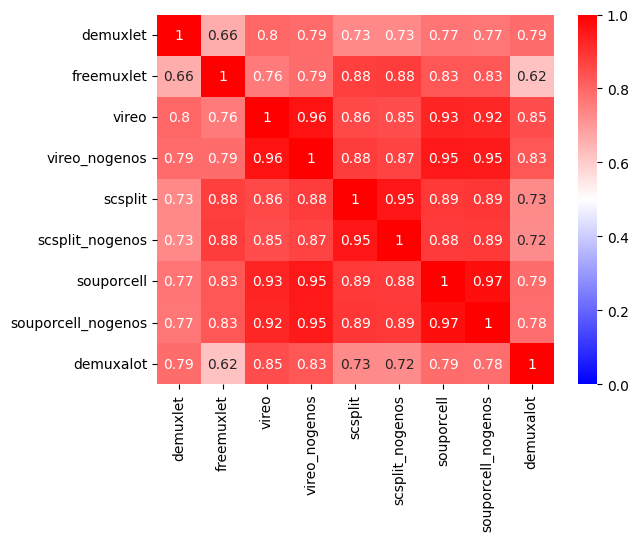

In [59]:
sns.heatmap(gex_pd_overlap, cmap='bwr', vmin=0, vmax=1.0, annot=True)

<Axes: >

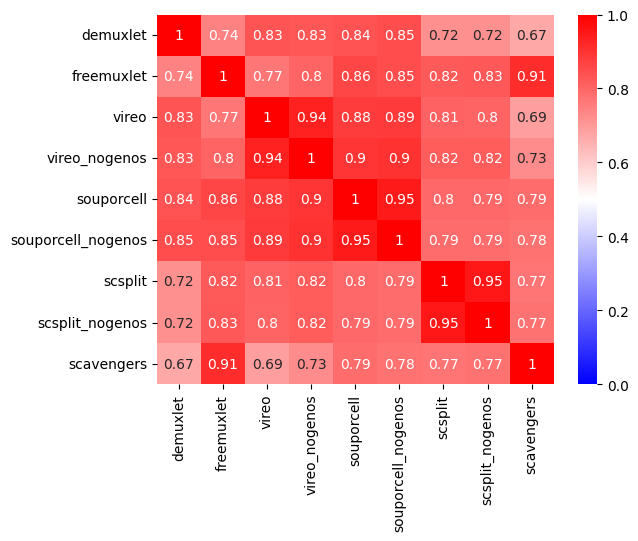

In [60]:
sns.heatmap(atac_pd_overlap, cmap='bwr', vmin=0, vmax=1.0, annot=True)

In [61]:
gex_pd_overlap.to_csv(f'{projdir}/csv/final_figures/figure4/gex_pd_20_20_corr.csv', sep='\t', header=True, index=True)
atac_pd_overlap.to_csv(f'{projdir}/csv/final_figures/figure4/atac_pd_20_20_corr.csv', sep='\t', header=True, index=True)

### let's look at mux now

In [63]:
exp = '10_20'
tmp_gex_mux = gex_mux[gex_mux['exp'] == exp]
tmp_atac_mux = atac_mux[atac_mux['exp'] == exp]
idx = sorted(tmp_gex_pd.index.unique())

inter_gex = pd.DataFrame(index = idx, columns = gex_methods)
for method in gex_methods:
    one_gex_pd = tmp_gex_pd[tmp_gex_pd['method'] == method]
    inter_gex[method] = one_gex_pd['donor_id'].sort_index()
    
inter_atac = pd.DataFrame(index = idx, columns = atac_methods)
for method in atac_methods:
    one_atac_pd = tmp_atac_pd[tmp_atac_pd['method'] == method]
    inter_atac[method] = one_atac_pd['donor_id'].sort_index()
    
status_gex = inter_gex.copy()
status_atac = inter_atac.copy()

for donor in donors:
    status_gex.replace({donor : 1}, inplace=True)
    status_atac.replace({donor : 1}, inplace=True)
    
status_gex.replace({'doublet' : 0, 'unassigned' : 0}, inplace=True)
status_atac.replace({'doublet' : 0, 'unassigned' : 0}, inplace=True)


n_drops = status_gex.shape[0]
gex_mux_overlap = pd.DataFrame(columns=gex_methods)
for method1 in gex_methods:
    gex_mux_overlap.loc[method1] = [np.sum(status_gex[method1] == status_gex[method2]) / n_drops
                            for method2 in gex_methods]
n_drops = status_atac.shape[0]
atac_mux_overlap = pd.DataFrame(columns=atac_methods)
for method1 in atac_methods:
    atac_mux_overlap.loc[method1] = [np.sum(status_atac[method1] == status_atac[method2]) / n_drops
                            for method2 in atac_methods]

<Axes: >

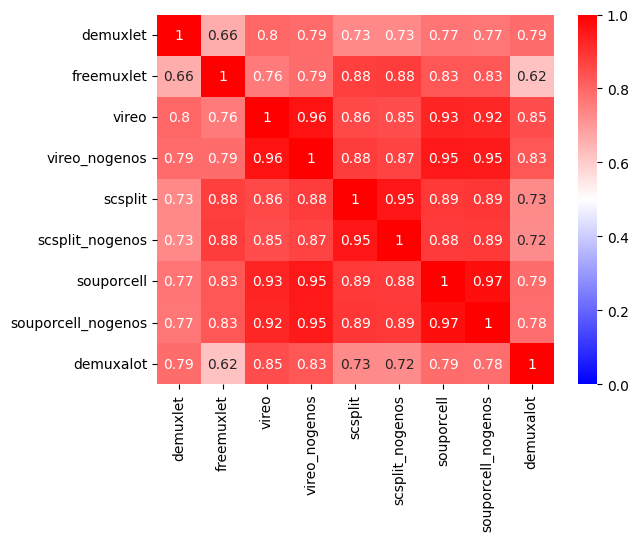

In [66]:
sns.heatmap(gex_mux_overlap, cmap='bwr', vmin=0, vmax=1.0, annot=True)

<Axes: >

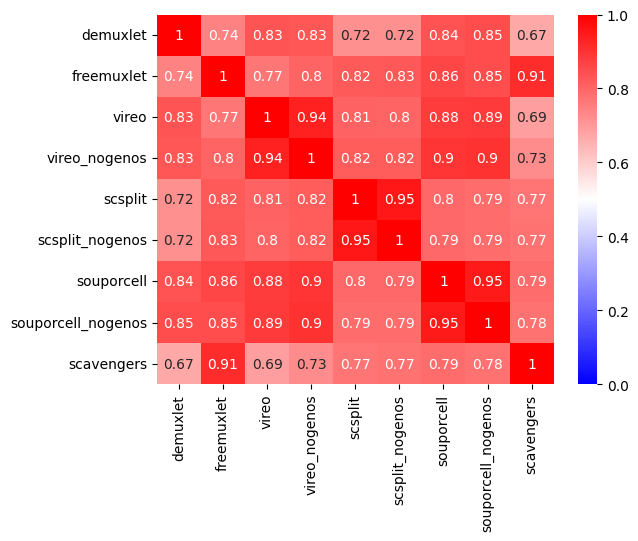

In [67]:
sns.heatmap(atac_mux_overlap, cmap='bwr', vmin=0, vmax=1.0, annot=True)

In [68]:
gex_mux_overlap.to_csv(f'{projdir}/csv/final_figures/figure4/gex_mux_10_20_corr.csv', sep='\t', header=True, index=True)
atac_mux_overlap.to_csv(f'{projdir}/csv/final_figures/figure4/atac_mux_10_20_corr.csv', sep='\t', header=True, index=True)

### what about correlation?

In [62]:
igvf_gex = pd.read_csv(f'{projdir}/csv/final_figures/figure4/igvf_overlap_gex.csv', sep='\t', header=0, index_col=0)
igvf_atac = pd.read_csv(f'{projdir}/csv/final_figures/figure4/igvf_overlap_atac.csv', sep='\t', header=0, index_col=0)

In [39]:
igvf_gex

,demuxlet,freemuxlet,vireo,vireo_nogenos,scsplit,scsplit_nogenos,souporcell,souporcell_nogenos,demuxalot
demuxlet,1.000000,0.758009,0.889891,0.870381,0.806374,0.755189,0.839001,0.837525,0.887792
freemuxlet,0.758009,1.000000,0.798078,0.834049,0.868807,0.793357,0.831131,0.872020,0.728236
vireo,0.889891,0.798078,1.000000,0.946257,0.846116,0.794472,0.898482,0.896350,0.915861
vireo_nogenos,0.870381,0.834049,0.946257,1.000000,0.866807,0.807358,0.906253,0.928386,0.875955
scsplit,0.806374,0.868807,0.846116,0.866807,1.000000,0.816080,0.843821,0.874873,0.791553
scsplit_nogenos,0.755189,0.793357,0.794472,0.807358,0.816080,1.000000,0.814670,0.816408,0.750861
souporcell,0.839001,0.831131,0.898482,0.906253,0.843821,0.814670,1.000000,0.903368,0.843067
souporcell_nogenos,0.837525,0.872020,0.896350,0.928386,0.874873,0.816408,0.903368,1.000000,0.828213
demuxalot,0.887792,0.728236,0.915861,0.875955,0.791553,0.750861,0.843067,0.828213,1.000000


In [40]:
gex_overlap

,demuxlet,freemuxlet,vireo,vireo_nogenos,souporcell,souporcell_nogenos,scsplit,scsplit_nogenos,demuxalot
demuxlet,1.000000,0.663800,0.797503,0.789492,0.772647,0.769466,0.731653,0.732831,0.786665
freemuxlet,0.663800,1.000000,0.758864,0.785723,0.831547,0.831429,0.876311,0.881258,0.621039
vireo,0.797503,0.758864,1.000000,0.963011,0.925904,0.922252,0.856402,0.849570,0.850630
vireo_nogenos,0.789492,0.785723,0.963011,1.000000,0.949464,0.947933,0.879020,0.870067,0.829191
souporcell,0.772647,0.831547,0.925904,0.949464,1.000000,0.970668,0.888797,0.884792,0.787136
souporcell_nogenos,0.769466,0.831429,0.922252,0.947933,0.970668,1.000000,0.891271,0.887266,0.784427
scsplit,0.731653,0.876311,0.856402,0.879020,0.888797,0.891271,1.000000,0.953587,0.727530
scsplit_nogenos,0.732831,0.881258,0.849570,0.870067,0.884792,0.887266,0.953587,1.000000,0.723053
demuxalot,0.786665,0.621039,0.850630,0.829191,0.787136,0.784427,0.727530,0.723053,1.000000


In [28]:
method = 'demuxlet'
pearsonr(igvf_gex[method], gex_overlap[method]) 

PearsonRResult(statistic=0.8558377988787981, pvalue=0.0032435747591379673)

In [41]:
gex_methods = igvf_gex.columns
gex_diff = pd.DataFrame(index=gex_methods, columns=gex_methods, data=0)
for method in gex_methods:
    gex_diff.loc[method] = igvf_gex[method] - gex_overlap[method]

In [43]:
atac_methods = igvf_atac.columns
atac_diff = pd.DataFrame(index=atac_methods, columns=atac_methods, data=0)
for method in atac_methods:
    atac_diff.loc[method] = igvf_atac[method] - atac_overlap[method]

In [44]:
gex_diff

,demuxlet,freemuxlet,vireo,vireo_nogenos,scsplit,scsplit_nogenos,souporcell,souporcell_nogenos,demuxalot
demuxlet,0.000000,0.094209,0.092388,0.080888,0.074722,0.022358,0.066354,0.068059,0.101127
freemuxlet,0.094209,0.000000,0.039214,0.048327,-0.007504,-0.087901,-0.000416,0.040591,0.107197
vireo,0.092388,0.039214,0.000000,-0.016754,-0.010286,-0.055098,-0.027422,-0.025902,0.065230
vireo_nogenos,0.080888,0.048327,-0.016754,0.000000,-0.012213,-0.062709,-0.043211,-0.019546,0.046764
scsplit,0.074722,-0.007504,-0.010286,-0.012213,0.000000,-0.137507,-0.044977,-0.016398,0.064024
scsplit_nogenos,0.022358,-0.087901,-0.055098,-0.062709,-0.137507,0.000000,-0.070122,-0.070858,0.027807
souporcell,0.066354,-0.000416,-0.027422,-0.043211,-0.044977,-0.070122,0.000000,-0.067300,0.055930
souporcell_nogenos,0.068059,0.040591,-0.025902,-0.019546,-0.016398,-0.070858,-0.067300,0.000000,0.043786
demuxalot,0.101127,0.107197,0.065230,0.046764,0.064024,0.027807,0.055930,0.043786,0.000000


In [45]:
atac_diff

,demuxlet,freemuxlet,vireo,vireo_nogenos,scsplit,scsplit_nogenos,souporcell,souporcell_nogenos,scavengers
demuxlet,0.000000,0.057033,0.091901,0.080185,-0.026004,0.067164,0.048278,0.042147,0.225638
freemuxlet,0.057033,0.000000,0.068898,0.059901,-0.108890,0.064581,0.020533,0.026571,-0.040590
vireo,0.091901,0.068898,0.000000,0.032768,-0.108741,0.016347,0.057087,0.053492,0.253960
vireo_nogenos,0.080185,0.059901,0.032768,0.000000,-0.117853,0.019149,0.058295,0.055036,0.235847
scsplit,-0.026004,-0.108890,-0.108741,-0.117853,0.000000,-0.190992,-0.100245,-0.092575,-0.064045
scsplit_nogenos,0.067164,0.064581,0.016347,0.019149,-0.190992,0.000000,0.044626,0.053438,0.069201
souporcell,0.048278,0.020533,0.057087,0.058295,-0.100245,0.044626,0.000000,0.011553,0.177716
souporcell_nogenos,0.042147,0.026571,0.053492,0.055036,-0.092575,0.053438,0.011553,0.000000,0.181663
scavengers,0.225638,-0.040590,0.253960,0.235847,-0.064045,0.069201,0.177716,0.181663,0.000000


In [35]:
gex_methods = igvf_gex.columns
gex_corrs = pd.DataFrame(index=gex_methods, columns=['pearsonr', 'spearmanr'], data=0)
for method in gex_methods:
    pearson =  pearsonr(igvf_gex[method], gex_overlap[method])[0]
    spearman =  spearmanr(igvf_gex[method], gex_overlap[method])[0]
    gex_corrs.loc[method] = [pearson, spearman]

In [36]:
atac_methods = igvf_atac.columns
atac_corrs = pd.DataFrame(index=atac_methods, columns=['pearsonr', 'spearmanr'], data=0)
for method in atac_methods:
    pearson =  pearsonr(igvf_atac[method], atac_overlap[method])[0]
    spearman =  spearmanr(igvf_atac[method], atac_overlap[method])[0]
    atac_corrs.loc[method] = [pearson, spearman]

In [37]:
gex_corrs

,pearsonr,spearmanr
demuxlet,0.855838,0.783333
freemuxlet,0.913916,0.883333
vireo,0.523317,0.500000
vireo_nogenos,0.476526,0.500000
scsplit,0.416395,0.466667
scsplit_nogenos,0.402164,0.866667
souporcell,0.112801,0.166667
souporcell_nogenos,0.181932,0.100000
demuxalot,0.846064,0.783333


In [38]:
atac_corrs

,pearsonr,spearmanr
demuxlet,0.219156,0.033333
freemuxlet,0.576518,0.483333
vireo,0.089365,0.183333
vireo_nogenos,-0.024501,0.200000
scsplit,-0.198891,-0.183333
scsplit_nogenos,0.046254,0.183333
souporcell,-0.856098,-0.800000
souporcell_nogenos,-0.699270,-0.783333
scavengers,0.109119,-0.066667


In [ ]:
pearsonr(igvf_gex[method], gex_overlap[method]) 